In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [2]:
def magnetic_lev(y, t, m, g, R, c, L, u):
    x1, x2, x3 = y

    dxdt = [x2,
            g - (c/m)*(x3**2/x1),
           -(R/L)*x3 + u/L]

    return dxdt

In [3]:
m = 0.05 # Mass of the ball [Kg]
g = 9.81 # Gravity [m/s²]
R = 10 # [Ω]
c = 0.0049 # [Hm]
L = 0.060 # [H]
u = 1 # 0 < u < 10V

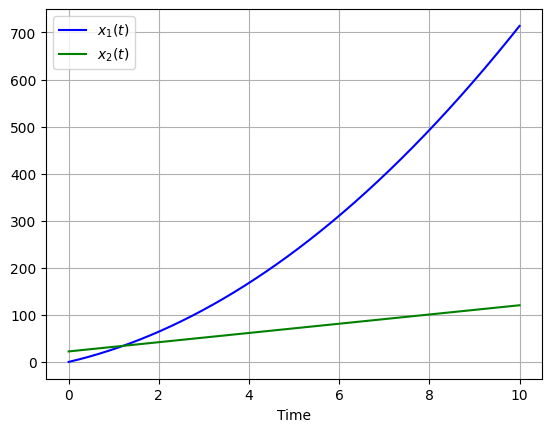

In [4]:
# Initial conditions
#y0 = [0.01, 0, 1]

xd = 0.05
u_eq = R*np.sqrt((m*g*xd)/c)
x2_eq = R*(np.sqrt((g*m*xd)/c))
x3_eq = np.sqrt((g*m*xd)/c)
y0 = [xd, x2_eq, x3_eq]


# Parameters of simulation
h = 1e-3
tfin = 10
N = np.int64(np.ceil((tfin-h)/h))
t = h + np.arange(0,N)*h

sol = odeint(magnetic_lev, y0, t, args=(m, g, R, c, L, u))

plt.plot(t, sol[:, 0], 'b', label = r'$x_1(t)$')
plt.plot(t, sol[:, 1], 'g', label = r'$x_2(t)$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

In [5]:
def Euler_integrate_L(m, g, R, c, L, u_eq, x0, tfin = 100, h = 1e-2):
    N = np.int64(np.ceil((tfin-h)/h))
    t = h + np.arange(0,N)*h
    
    # Condiciones iniciales
    Y_L = np.empty((N, 3))
    Y_L[0] = x0[0], x0[1], x0[2]
                  
    A = np.array([[0.0, 1.0, 0.0],
                  [g/x0[0], 0.0, -2*(np.sqrt((c*g)/(m*x0[0])))],
                  [0.0, 0.0, -R/L]])

    B = np.array([0,
                  0,
                  1/L])

    u = u_eq
    
    for k in range(N-1):
        # Vector no lineal
        Y_L[k+1] = Y_L[k] + ( np.dot(A,Y_L[k]) + B*u )*h
    
    # return t, y
    return t, Y_L

In [10]:
A = np.array([[0.0, 1.0, 0.0],
              [g/xd, 0.0, -2*(np.sqrt((c*g)/(m*xd)))],
              [0.0, 0.0, -R/L]])
A

array([[   0.        ,    1.        ,    0.        ],
       [ 196.2       ,    0.        ,   -8.76985747],
       [   0.        ,    0.        , -166.66666667]])

In [12]:
print(np.linalg.eigvals(A))

[  14.00714104  -14.00714104 -166.66666667]


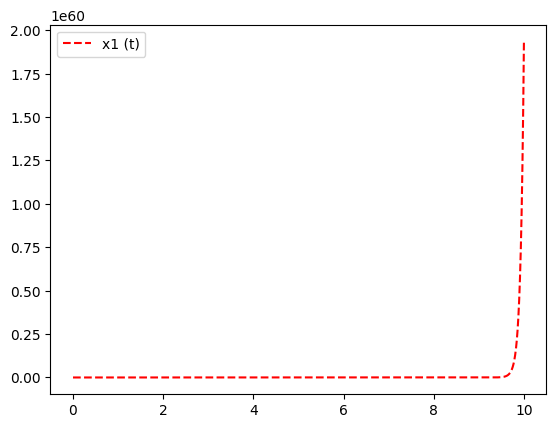

In [6]:
h = 1e-3
tfin = 10
t, YL = Euler_integrate_L(m, g, R, c, L, u_eq, y0, tfin, h)

plt.figure
plt.plot(t, YL[:,0], 'r--', label = 'x1 (t)')
#plt.plot(t, YL[:,1], 'g--', label = 'x2 (t)')
plt.legend()
plt.show()